In [44]:
# Install MySQL Connector Python Module
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Importing the warning library to ignore all warnings upon compilation
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Importing all the required libraries for connecting to the database and performing various visualizations
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [47]:
# Connecting to the database 
connection = mysql.connector.connect(host = 'localhost', 
                                    user = 'root',
                                    passwd = 'tigertiger',
                                    db = 'DMA_Project',
                                    auth_plugin = 'mysql_native_password')

In [48]:
# Printing the connection variable
connection

In [49]:
# Show the tables in the database
list_of_tables = pd.read_sql_query('SHOW TABLES FROM DMA_PROJECT', connection)

In [50]:
list_of_tables

,Tables_in_dma_project
0,EQUIPMENT_SET
1,FINANCE_DEPARTMENT
2,LOCKER
3,manager
4,member
5,nutritionist
6,personal_trainer


In [51]:
# Query 1 - Display member ID, member name, member phone number, member email and their corresponding personal trainer details such as their name, phone number and email

query_1 = pd.read_sql_query('select m.Mem_ID, m.Mem_Name, m.Mem_PhoneNumber, m.Mem_Email, pt.PT_Name, pt.PT_PhoneNumber, pt.PT_Email from member m INNER JOIN personal_trainer pt on m.PT_ID = pt.PT_ID order by Mem_ID asc', connection)

In [52]:
query_1

,Mem_ID,Mem_Name,Mem_PhoneNumber,Mem_Email,PT_Name,PT_PhoneNumber,PT_Email
0,701,Averil Madonna,214-193-2961,amadonna10@webeden.com,Kelley Towson,116-183-7518,ktowsonr@globo.com
1,702,Merci Smaile,237-521-8026,msmaile11@google.fr,Xenos Loughlan,323-784-8680,xloughlanl@google.co.jp
2,703,Lexis Canero,578-568-4892,lcanero12@com.com,Goldina Rainford,128-336-2863,grainfordq@mayoclinic.com
3,704,Carolina Frondt,690-613-8933,cfrondt13@cargocollective.com,Garland Ryce,688-631-5689,gryceo@bigcartel.com
4,706,Marinna Errigo,888-369-4487,merrigo15@plala.or.jp,Garland Ryce,688-631-5689,gryceo@bigcartel.com
5,707,Morey Lillecrop,809-628-5336,mlillecrop16@answers.com,Marten Mariette,939-934-1709,mmariettem@buzzfeed.com
6,710,Quinn Andrasch,381-691-1916,qandrasch19@seesaa.net,Charissa Smee,687-194-9115,csmeen@oracle.com
7,711,Fionnula Villaret,851-133-9439,fvillareta@sogou.com,Kristen Henriques,983-990-0027,khenriques2@answers.com
8,712,Johannah Connold,868-462-1349,jconnoldb@twitpic.com,Cynthia Tabourier,299-654-7252,ctabourier8@mysql.com
9,713,Erena McCurrie,335-558-3188,emccurriec@gov.uk,Sandro Cogdon,385-570-8687,scogdon5@canalblog.com


In [53]:
# Query 2 - Display nutritionist ID, name and salary where salary is greater than average salary of all the nutritionists

query_2 = pd.read_sql_query('select n1.N_ID, n1.N_Name, n1.N_salary from nutritionist n1 where n1.N_Salary > (select avg(n2.N_Salary) from nutritionist n2)', connection)

In [54]:
query_2

,N_ID,N_Name,N_salary
0,202,Nolan Chafer,45500.5
1,203,Oralla Southwell,50000.0
2,208,Rosemary Gubbins,49002.9
3,211,Anthea Speke,49275.1
4,212,Rupert Bloodworthe,47359.0
5,213,Helli Fildery,46072.7


In [55]:
# Query 3 - Retrieve the finance department employee details like ID, name, phone number and email who collects fees from more than 5 members

query_3 = pd.read_sql_query('select fd.FD_Emp_ID, fd.FD_Emp_Name, fd.FD_Emp_PhoneNumber, fd.FD_Emp_Email from FINANCE_DEPARTMENT fd where 5 < (select count(*) from member m where m.FD_Emp_ID = fd.FD_Emp_ID)', connection)

In [56]:
query_3

,FD_Emp_ID,FD_Emp_Name,FD_Emp_PhoneNumber,FD_Emp_Email
0,105,Madan Lal,333-555-8881,mlal143@lords.com
1,106,Vicky Donnovan,367-543-8121,donnovanvick@mysticfalls.com
2,107,Erlich Bachmann,412-754-3243,erlich@piedpier.com
3,108,Albie Morkel,332-545-5459,albiem34@csa.com
4,109,Tom Cruise,384-723-3448,cruisetommy56@hollywood.com


In [57]:
# Query 4 - Retrieve Name and ID of those managers who manage those nutritionists that give diet plans to members who pay membership fees more than 7500 

query_4 = pd.read_sql_query('select distinct(m1.Mangr_ID), m1.Mangr_Name from Manager m1 INNER JOIN Nutritionist n on (m1.Mangr_ID=n.Mangr_ID) INNER JOIN MEMBER mem on n.N_ID=mem.N_ID where mem.Mem_Fees > \'7500\'', connection)

In [58]:
query_4

,Mangr_ID,Mangr_Name
0,4,Richard Perott
1,3,Zeke Halfacre
2,1,Kunal Shastri
3,5,Frank Van Merwe
4,6,Fred Klaasen
5,8,Bhaichung Bhutia
6,2,Byrom Alfwy
7,9,Gareth Bale
8,7,Jordan Pickford


In [59]:
# Query 5 - Display the locker numbers used by members using EXISTS operator

query_5 = pd.read_sql_query('select l.locker_id from locker l where EXISTS (select m.Mem_ID, m.Mem_Name from member m where m.Locker_ID = l.locker_id)', connection)

In [60]:
query_5

,locker_id
0,21
1,22
2,23
3,25
4,26
5,27
6,29
7,30
8,31
9,32


In [62]:
# Query 6 - Display member details like ID, Name, Phone Number, Email who use equipment set ID > 902 using ANY operator

query_6 = pd.read_sql_query('select m.Mem_Id, m.Mem_Name, m.Mem_PhoneNumber, m.Mem_Email from member m where m.EquipmentSet_ID = ANY (select e.EquipmentSet_ID from Equipment_Set e where e.EquipmentSet_ID > 902)', connection) 

In [63]:
query_6

,Mem_Id,Mem_Name,Mem_PhoneNumber,Mem_Email
0,701,Averil Madonna,214-193-2961,amadonna10@webeden.com
1,704,Carolina Frondt,690-613-8933,cfrondt13@cargocollective.com
2,707,Morey Lillecrop,809-628-5336,mlillecrop16@answers.com
3,724,Jammie Celli,601-361-0776,jcellin@is.gd
4,725,Loleta Barthelmes,300-901-3070,lbarthelmeso@umich.edu
5,752,Warner Woolward,783-885-7459,wwoolward1f@google.com.hk
6,706,Marinna Errigo,888-369-4487,merrigo15@plala.or.jp
7,713,Erena McCurrie,335-558-3188,emccurriec@gov.uk
8,718,Annie Blacksell,121-435-9649,ablacksellh@wikia.com
9,721,Petey Pottle,356-123-0944,ppottlek@about.com


In [64]:
# Query 7 - Display minimum, maximum and average salary of managers

query_7 = pd.read_sql_query('select min(Mangr_salary) as Minimum_Salary_of_Manager, max(Mangr_salary) as Maximum_Salary_of_Manager, avg(Mangr_salary) as Average_Salary_of_Manager from manager', connection)

In [65]:
query_7

,Minimum_Salary_of_Manager,Maximum_Salary_of_Manager,Average_Salary_of_Manager
0,42453.2,91234.0,69871.631641


In [66]:
# Query 8 - Retrieve the count of Personal_Trainers who are managed by Manager ID number 2 

query_8 = pd.read_sql_query('SELECT count(*) as Number_of_Personal_Trainers FROM personal_trainer group by Mangr_ID having Mangr_ID=2', connection)

In [67]:
query_8

,Number_of_Personal_Trainers
0,5


In [68]:
# Query 9 - Display finance department employee details whose name begins with D or E

query_9 = pd.read_sql_query('select * from finance_department where FD_Emp_Name like \'D%\' or FD_Emp_Name like \'E%\'', connection)

In [69]:
query_9

,FD_Emp_ID,FD_Emp_Name,FD_Emp_DOB,FD_Emp_PhoneNumber,FD_Emp_Email,FD_Emp_Address,Mangr_ID
0,101,Derek Abbotson,2001-05-20,947-218-2617,derekabbotson@gmail.com,170 Parker Hill,2
1,103,Doralynn Coatsworth,1990-11-12,901-367-2617,dcoatsworth6@hotmail.com,881 Hungtington Ave,3
2,107,Erlich Bachmann,1985-03-12,412-754-3243,erlich@piedpier.com,857 Opera Pl,3


<AxesSubplot:xlabel='Manager_Name', ylabel='Manager_Salary'>

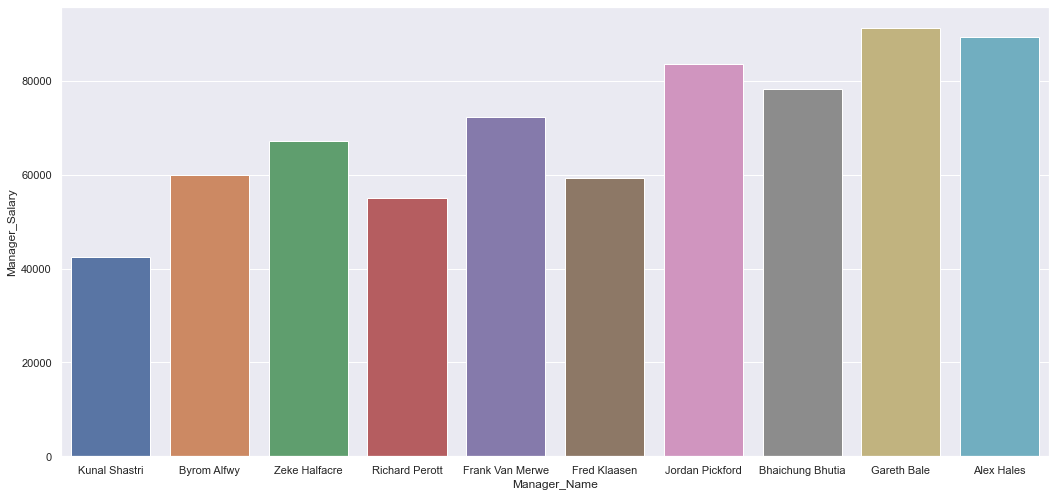

In [73]:
# Bar Plot of Manager Name vs Manager Salary
barplot_df = pd.DataFrame()
barplot_df['Manager_Name'] = pd.read_sql_query('select Mangr_Name from manager', connection)
barplot_df['Manager_Name'] = barplot_df['Manager_Name'].astype(str)
barplot_df['Manager_Salary'] = pd.read_sql_query('select Mangr_Salary from manager', connection)
barplot_df['Manager_Salary'] = barplot_df['Manager_Salary'].astype(float)
sns.set(rc={'figure.figsize':(17.7,8.27)})
sns.barplot(barplot_df['Manager_Name'],barplot_df['Manager_Salary'])

<AxesSubplot:xlabel='Mem_Name', ylabel='Mem_Fees'>

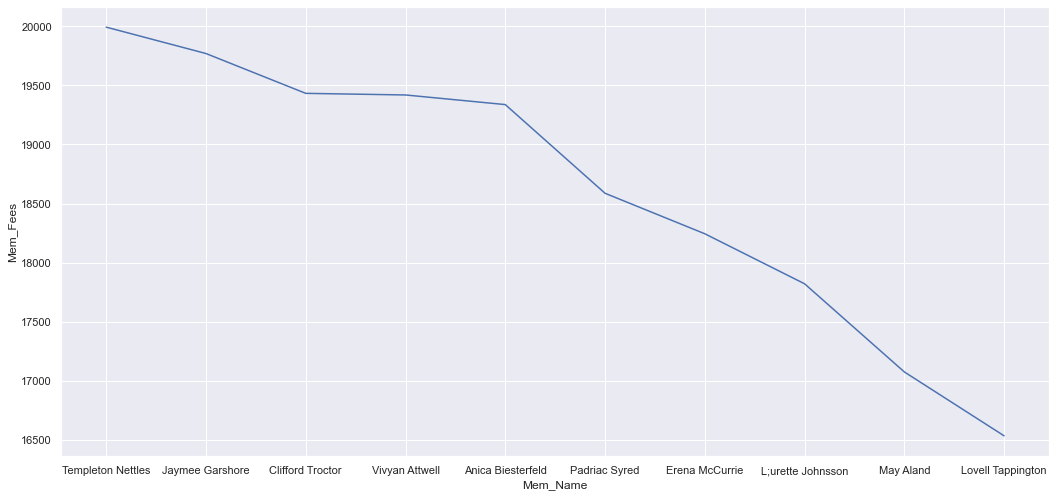

In [75]:
# Line Plot of Member Name vs Member Fees (Top 10 Highest Fees Paying Members)
lineplot_df = pd.DataFrame()
lineplot_df['Mem_Name'] = pd.read_sql_query('select Mem_Name from member order by Mem_Fees DESC limit 10', connection)
lineplot_df['Mem_Fees'] = pd.read_sql_query('select Mem_Fees from member order by Mem_Fees DESC limit 10', connection)
sns.set(rc={'figure.figsize':(17.7,8.27)})
sns.lineplot(data=lineplot_df, x="Mem_Name", y="Mem_Fees")

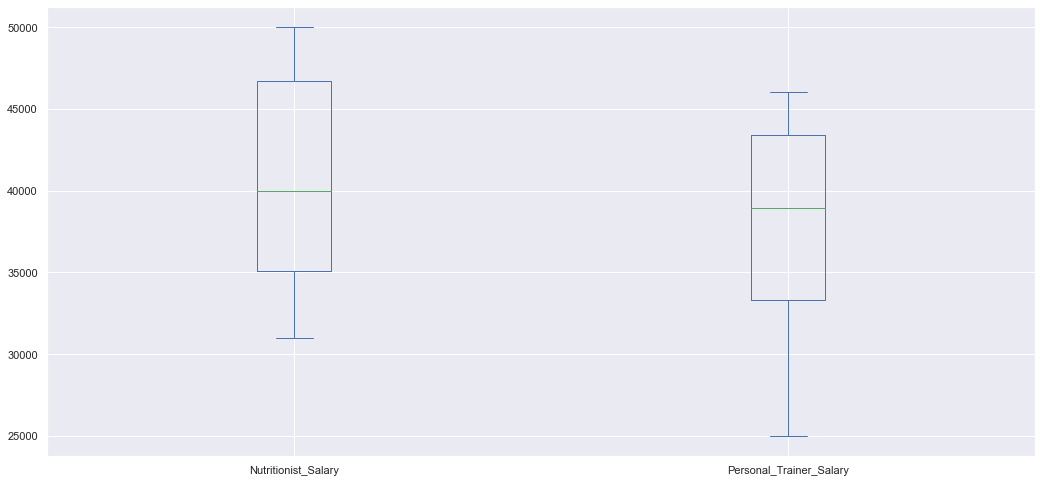

In [78]:
# Boxplots of Nutritionist Salary and Personal Trainer Salary
boxplot_df = pd.DataFrame()
boxplot_df['Nutritionist_Salary'] = pd.read_sql_query('select N_Salary from Nutritionist', connection)
boxplot_df['Personal_Trainer_Salary'] = pd.read_sql_query('select PT_Salary from Personal_Trainer', connection)
data = pd.DataFrame({"Nutritionist_Salary": boxplot_df['Nutritionist_Salary'].astype(float), "Personal_Trainer_Salary": boxplot_df['Personal_Trainer_Salary'].astype(float)})
ax = data[['Nutritionist_Salary', 'Personal_Trainer_Salary']].plot(kind='box')
plt.show()

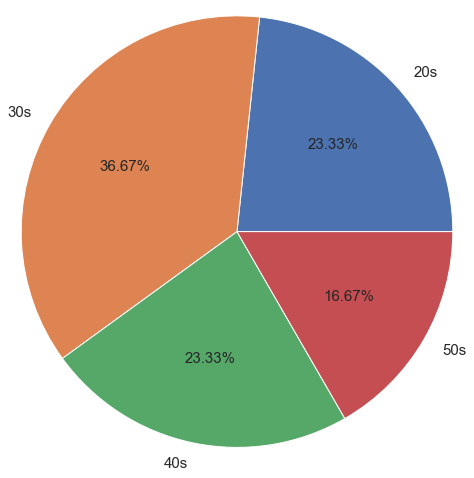

In [89]:
# Piechart of Members Age Groups
pie_df = pd.DataFrame()
pie_df1 = pd.DataFrame()
pie_df2 = pd.DataFrame()
pie_df3 = pd.DataFrame()
pie_df4 = pd.DataFrame()
pie_chart = pd.DataFrame()
pie_df['Age'] = pd.read_sql_query('SELECT DATE_FORMAT(FROM_DAYS(DATEDIFF(NOW(), Mem_DOB)), \'%Y\') FROM Member order by Mem_DOB desc', connection)
pie_df['Age'] = pie_df['Age'].str.lstrip('0')
pie_df1['Age'] = pie_df.iloc[0:14,:]
a = round((len(pie_df1)/len(pie_df))*100,2)
pie_df2['Age'] = pie_df.iloc[14:36,:]
b = round((len(pie_df2)/len(pie_df))*100,2)
pie_df3['Age'] = pie_df.iloc[36:50,:]
c = round((len(pie_df3)/len(pie_df))*100,2)
pie_df4['Age'] = pie_df.iloc[50:,:]
d = round((len(pie_df4)/len(pie_df))*100,2)

textprops = {"fontsize":15}
pie_chart = pd.DataFrame({"Age_Groups": ['20s','30s','40s','50s'], "Percentages" : [a,b,c,d]})
plt.pie(pie_chart["Percentages"], labels = pie_chart["Age_Groups"], radius = 1.2, autopct = "%0.2f%%", textprops = textprops)
plt.show()

In [91]:
# Scatterplot of Ages of Personal Trainers
scatter_df = pd.DataFrame()
scatter_df['Personal_Trainer_Names'] = pd.read_sql_query('SELECT PT_Name from PERSONAL_TRAINER order by PT_DOB desc', connection)
scatter_df['Personal_Trainer_Ages'] = pd.read_sql_query('SELECT DATE_FORMAT(FROM_DAYS(DATEDIFF(NOW(), PT_DOB)), \'%Y\') FROM Personal_Trainer order by PT_DOB desc', connection)
scatter_df['Personal_Trainer_Ages'] = scatter_df['Personal_Trainer_Ages'].str.lstrip('0')
fig = px.scatter(x=scatter_df['Personal_Trainer_Names'], y=scatter_df['Personal_Trainer_Ages'])
fig.show()

In [94]:
# Bubble Chart of Ages of Finance Department Employees
bubble_df = pd.DataFrame()
bubble_df['Finance_Department_Names'] = pd.read_sql_query('SELECT FD_Emp_Name from FINANCE_DEPARTMENT', connection)
bubble_df['Finance_Department_Ages'] = pd.read_sql_query('SELECT DATE_FORMAT(FROM_DAYS(DATEDIFF(NOW(), FD_Emp_DOB)), \'%Y\') FROM FINANCE_DEPARTMENT', connection)
bubble_df['Finance_Department_Ages'] = bubble_df['Finance_Department_Ages'].str.lstrip('0')
fig = go.Figure(data = [go.Scatter(x=bubble_df['Finance_Department_Names'],y=bubble_df['Finance_Department_Ages'], 
                                   mode='markers',
    marker=dict(
        color=[120, 125, 130, 135, 140, 145, 150, 155, 160, 165],
        size=[15,25,35,45,55,65,70,75,80,85],
        showscale=True
        ))])
fig.show()